# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* sajjad taghizadeh

*SID:* 810102425

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from scipy.integrate import quad
from scipy.special import gamma
from scipy.stats import beta

In [31]:
class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        self.a = alpha
        self.b = beta
        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        beta_function = gamma(self.a + self.b) / (gamma(self.a) * gamma(self.b))
        pdf_of_beta = (x ** (self.a - 1)) * ((1 - x) ** (self.b - 1)) / beta_function  
        return pdf_of_beta
        ######################  TODO  ########################

    def pdff(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        return beta.pdf(x, self.a, self.b)


    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        unnormalized_pdf_variable = x**(self.a - 1) * (1 - x)**(self.b - 1)
        return unnormalized_pdf_variable
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach
        Cc = gamma(self.a + 1)* gamma(self.b + 1) / gamma(self.a + self.b + 2)
        return Cc
        ######################  TODO  ########################

The pdf function is implemented in two ways, manually and with a ready-made function, each of which is acceptable.
Because for large A and B, the manually implemented function consumes runtime.

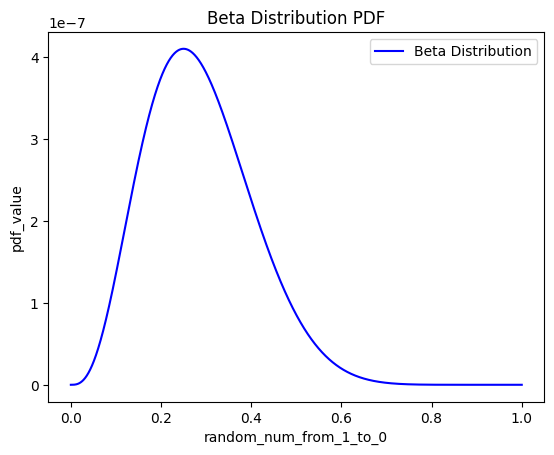

In [32]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    x = np.arange(0, 1, 0.0001)  

    pdf_values = beta.pdf(x)

    plt.plot(x, pdf_values, label="Beta Distribution", color="blue")
    plt.xlabel("random_num_from_1_to_0")
    plt.ylabel("pdf_value")
    plt.title("Beta Distribution PDF")
    plt.legend()
    plt.show()

Bet = BetaDistribution(4, 10)
plot_beta_dist(Bet)

This is a function to plot the beta distribution function.

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [33]:
######################  TODO  ########################
# Read coin_flips.txt
with open(r"data\coin_flips.txt", "r") as file:
    data = [line.strip() for line in file]
print(data[0:10])

######################  TODO  ########################

['H', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T']


## Prior: Uniform

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

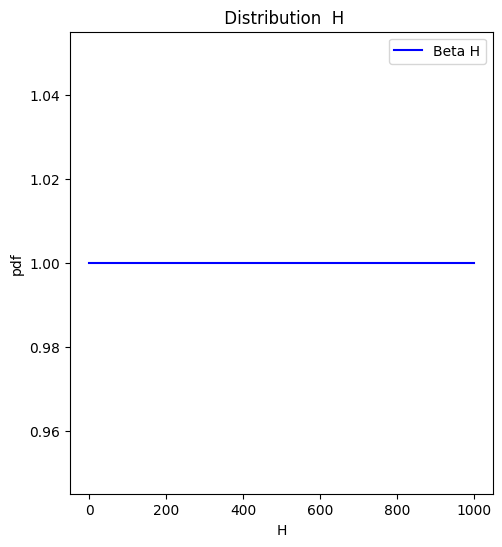

In [34]:
######################  TODO  ########################
a_prior = 1
b_prior = 1
x = np.arange(0, 1000, 1)
beta_h = BetaDistribution(a_prior, b_prior) 
prior_pdf_h = beta_h.pdf(x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, prior_pdf_h, label='Beta H', color='blue')
plt.title(" Distribution  H")
plt.xlabel("H")
plt.ylabel("pdf")
plt.legend()
######################  TODO  ########################

Uniform prior distribution, which means that without knowing any specific information beforehand, we will have a linear uniform distribution.


Now calculate the final posterior mean and variance.

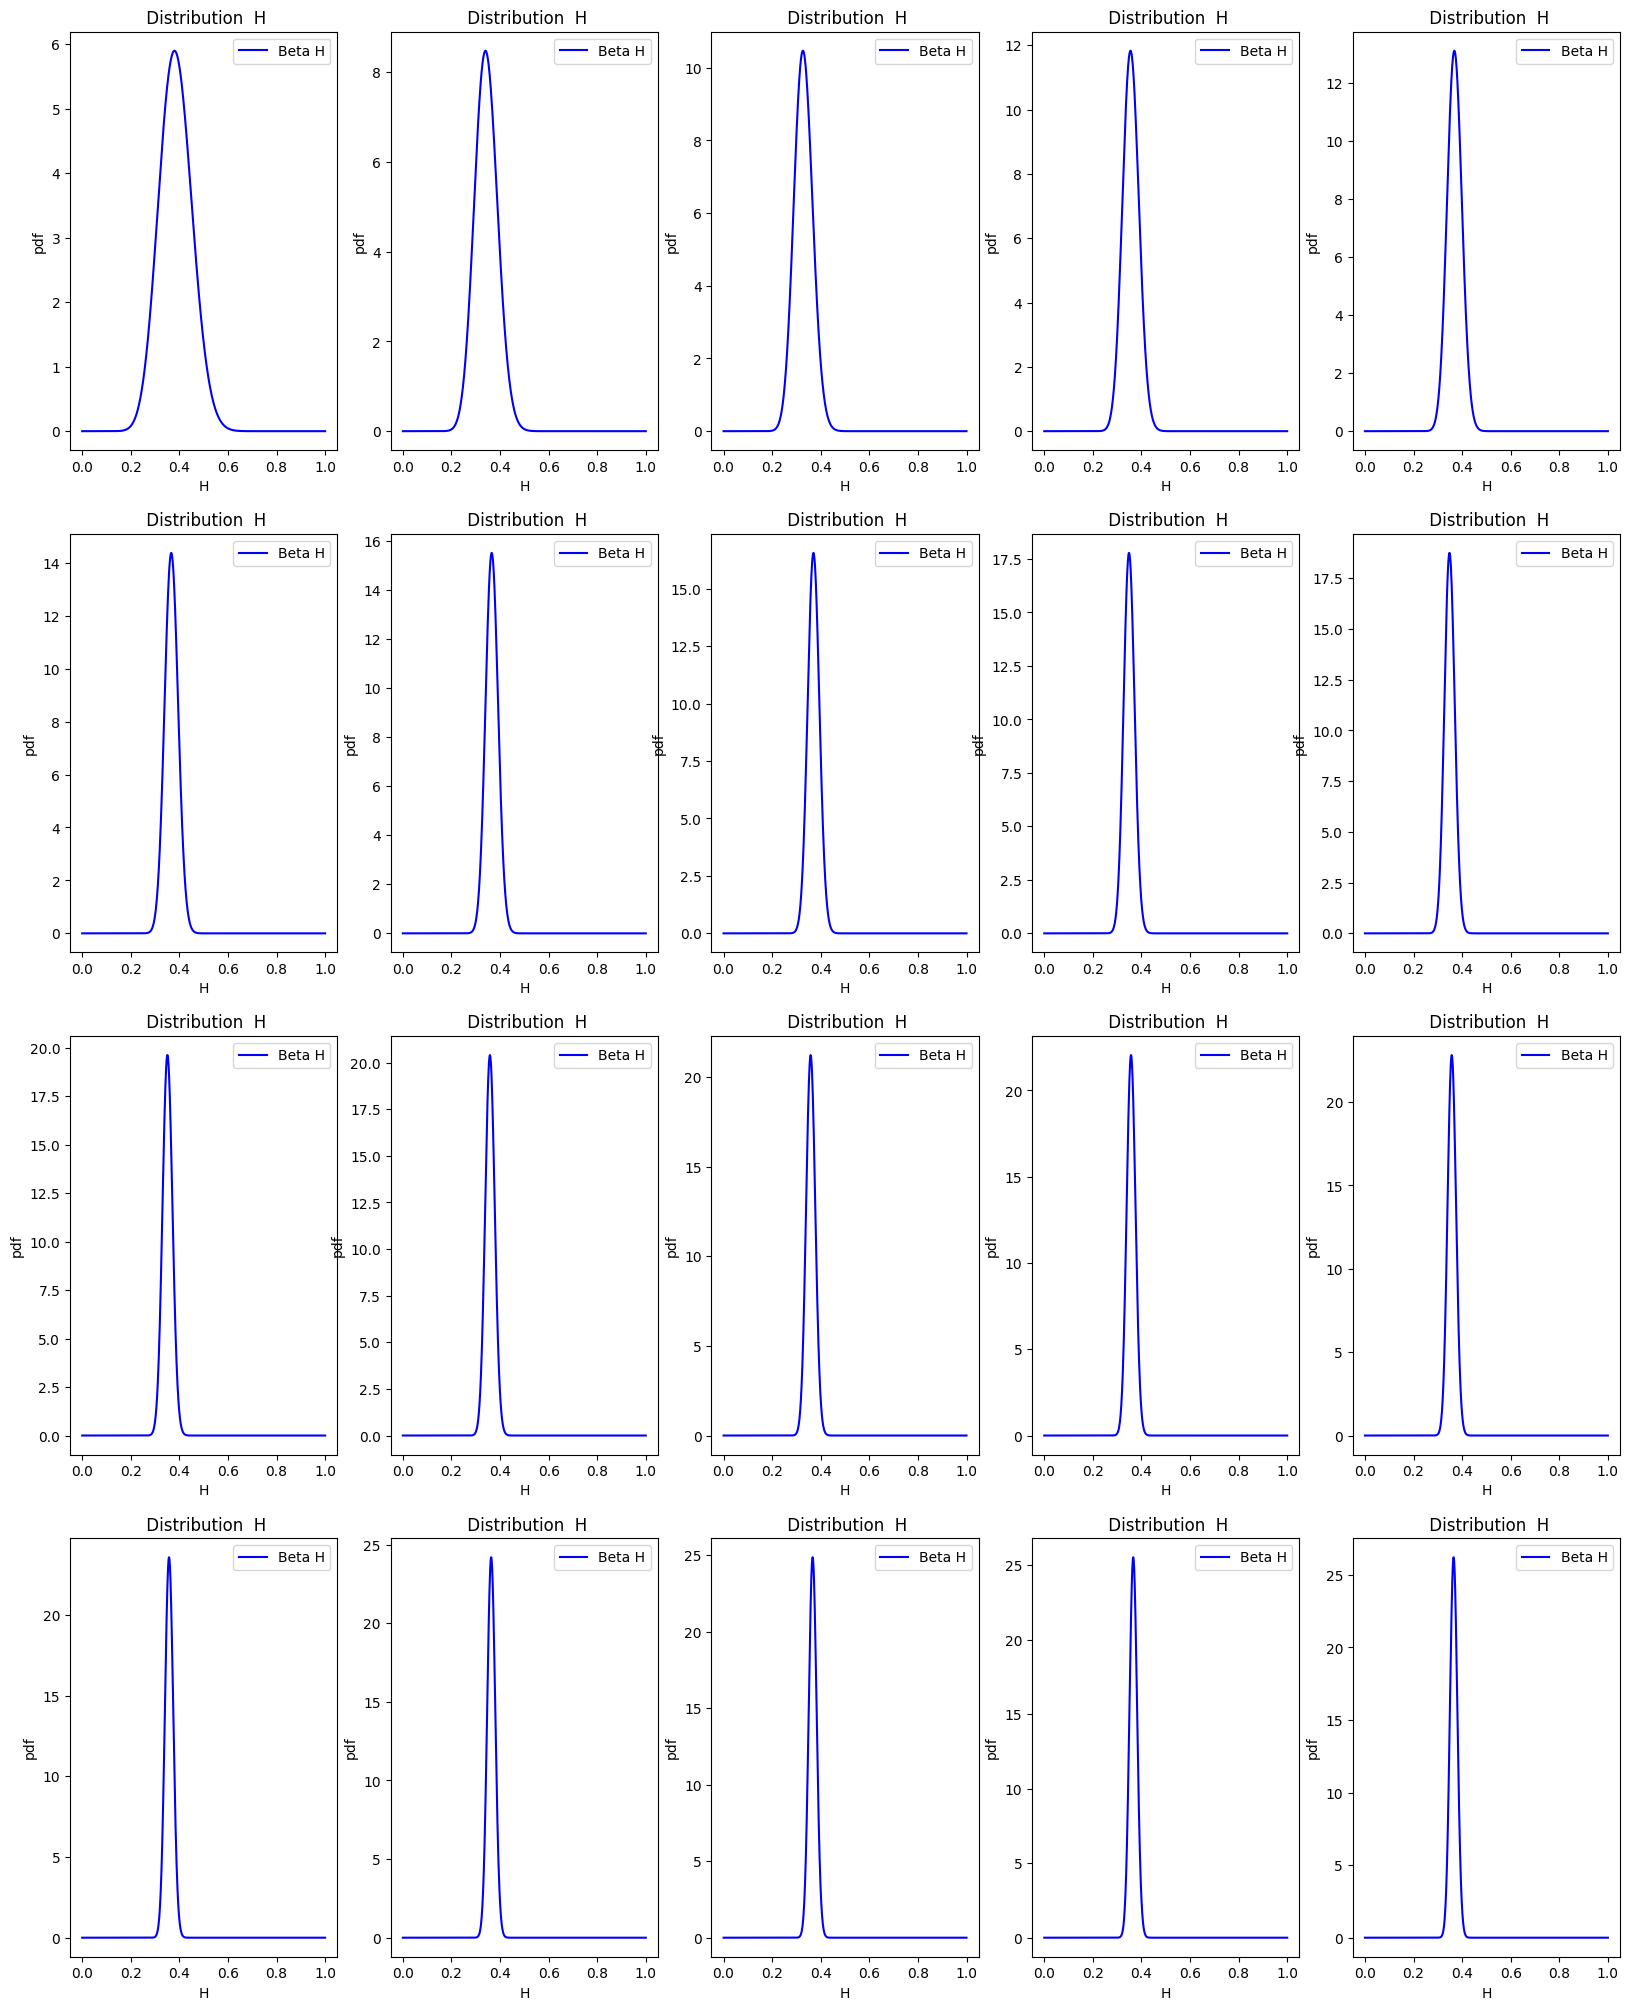

0.1336529334153229
0.3652694610778443


In [35]:
######################  TODO  ########################
j=1
plt.figure(figsize=(20, 25))
for i in range(50,len(data)+1,50):
    a_post = data[0: i].count("H") + 1
    b_post =data[0: i].count("T") + 1
    x = np.linspace(0, 1, 1000)
    beta_h = BetaDistribution(a_post, b_post) 
    beta_t = BetaDistribution(a_post, b_post)  
    post_pdf_h = beta_h.pdff(x)
    post_pdf_t = beta_t.pdff(x)

    plt.subplot(4, 5, j)
    plt.plot(x, post_pdf_h, label='Beta H', color='blue')
    plt.title(" Distribution  H")
    plt.xlabel("H")
    plt.ylabel("pdf")
    plt.legend()
    j+=1

plt.show()

vari1 = (a_post * (a_post+1)) / (((a_post + b_post)) * (a_post + b_post + 1))
mean1 = (a_post) / (a_post + b_post)
print(vari1)
print(mean1)

######################  TODO  ########################

Our posterior distribution, having the necessary information and having the information related to the question, has obtained the final distribution, which is no longer uniform and shows us the beta distribution.

## Prior: $Beta(4, 10)$

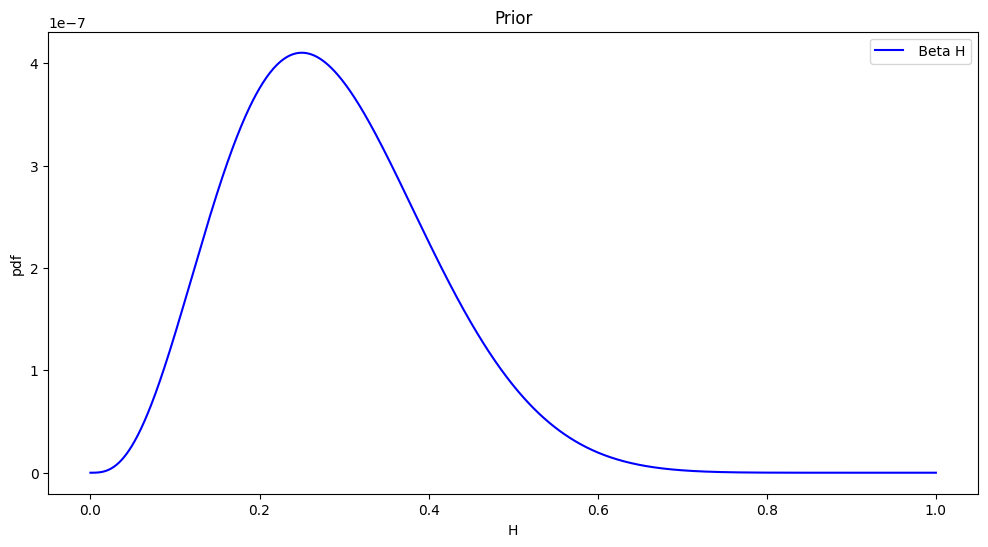

In [36]:
######################  TODO  ########################
alpha_prior2 = 4
beta_prior2 = 10

x = np.linspace(0, 1, 1000)
beta = BetaDistribution(alpha_prior2,beta_prior2)
prior_pdf2 = beta.pdf(x)

plt.figure(figsize=(12, 6))
plt.plot(x, prior_pdf2, label=' Beta H', color='blue')
plt.title("Prior" )
plt.xlabel("H")
plt.ylabel("pdf" )
plt.legend()

beta2 = BetaDistribution(alpha_prior2,beta_prior2)
prior_pdf3 = beta2.pdf(x)

plt.show()

######################  TODO  ########################

The prior distribution of the beta function, given initial A and B without using our own data, is like this graph predicting the probability distribution that we want to obtain later.

Now calculate the final posterior mean and variance.

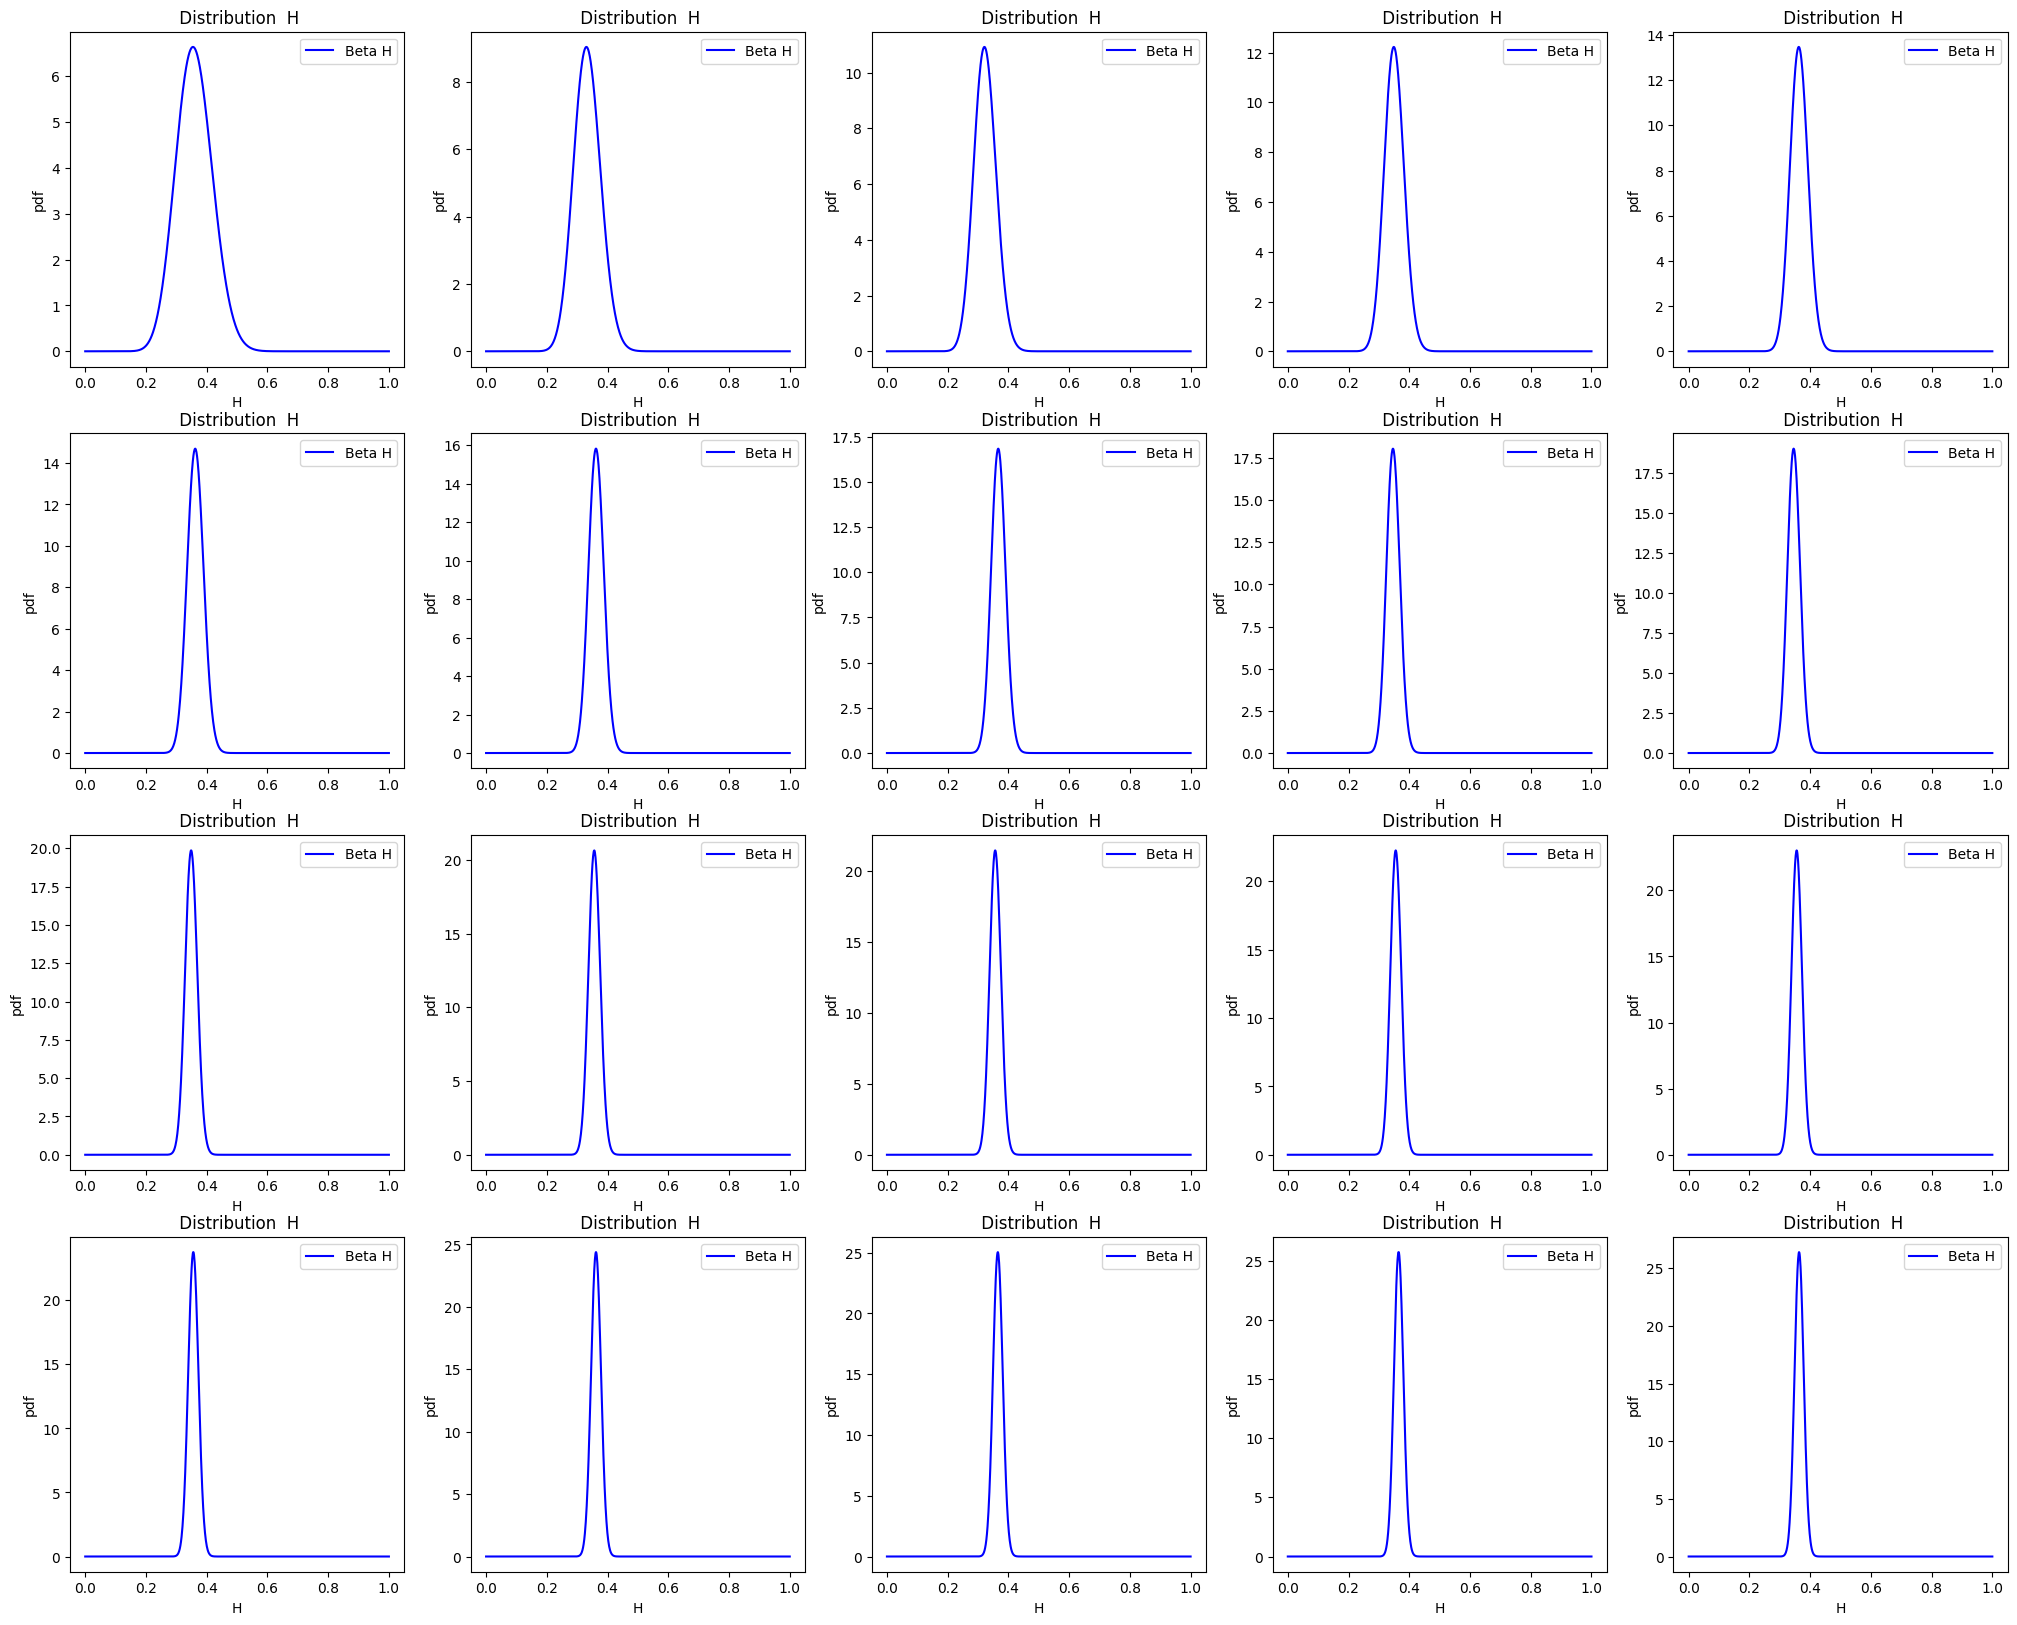

0.363905325443787
0.13265514326522285


In [37]:
# # ######################  TODO  ########################
from scipy.stats import beta
j=1
plt.figure(figsize=(25, 20))
for i in range(50,len(data)+1,50):

    a_post2 = data[0:i].count("H") + 4
    b_post2 =data[0:i].count("T") + 10
    x2 = np.linspace(0, 1, 1000)
    beta_h2 = BetaDistribution(a_post2, b_post2) 
    post_pdf_h2 = beta_h2.pdff(x2)

    plt.subplot(4, 5, j)
    plt.plot(x2, post_pdf_h2, label='Beta H', color='blue')
    plt.title(" Distribution  H")
    plt.xlabel("H")
    plt.ylabel("pdf")
    plt.legend()
    j+=1
plt.show()


vari2 = (a_post2 * (a_post2+1)) / (((a_post2 + b_post2)) * (a_post2 + b_post2 + 1))
mean2 = (a_post2) / (a_post2 + b_post2)
print(mean2)
print(vari2)


# # ######################  TODO  ########################

To compare these two cases, it can be explained as follows: by having new information about A and B, it is as if we have an initial assumption about the back or heads of the coin, and now with this information we are making a judgment about our own data. If we want to analyze a graph, because A is smaller than B, logically the peak of the graph will be more inclined to the left, giving us a slightly different estimate.